# **Taller #2**

Johan Baron - 
Carolina Rincón -
Juan Jose -

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog
!pip install yfinance
import yfinance as yf
import cvxpy as cp
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


**Punto 1**
Dibujar la región factible el siguiente problema de programación lineal (LP) con dos variables:

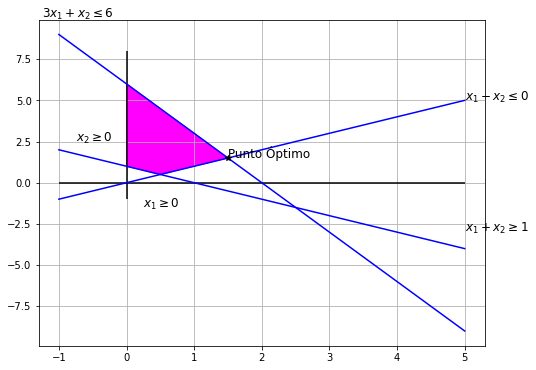

In [ ]:
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Lineas de restricción
ax.hlines(0, -1, 5)
ax.vlines(0, -1, 8)
ax.plot(np.linspace(-1, 5, 100), 1-1*np.linspace(-1, 5, 100), color="b")
ax.plot(np.linspace(-1, 5, 100), np.linspace(-1, 5, 100), color="b")
ax.plot(np.linspace(-1, 5, 100), 6-3*np.linspace(-1, 5, 100), color="b")
ax.text(5, -3, "$x_1 + x_2 \geq 1$", size=12)
ax.text(5, 5, "$x_1 - x_2 \leq 0$", size=12)
ax.text(-1.25, 10, "$3x_1 + x_2 \leq 6$", size=12)
ax.text(0.25, -1.5, "$x_1 \geq 0$", size=12) 
ax.text(-0.75, 2.5, "$x_2 \geq 0$", size=12) 

# Región Factible
feasible_set = Polygon(np.array([[0, 1], 
                                 [0.5, 0.5], 
                                 [1.5, 1.5], 
                                 [0, 6]]), 
                       color="magenta")
ax.add_patch(feasible_set)


# Punto óptimo
ax.plot(1.5, 1.5, "*", color="black")
ax.text(1.5, 1.5, "Punto Óptimo", size=12)

plt.show()

R/ La región factible de la grafica es l parte encerrada en color fucsia la cual, lhace uso y combinaaciones de las dos restricciones. la zona hacia arriba es la parte no factible. la solucion es el vertice de la region factible.

**Punto 2**
2. Usted desea invertir la suma de $80 millones en cuatro fondos mutuos que tienen diferentes retornos esperados (E(Ri)), así como diferentes ponderaciones en acciones de capitalización grande, mediana y pequeña.
La asignación anterior debe contener al menos un 35 % de acciones de gran capitalización, un 30% de mediana capitalización y un 15% de acciones de pequeña capitalización. Encuentre una asignación factible con el retorno esperado más alto, bajo el supuesto de que solo se le permite mantener posiciones largas en los fondos. Para ello, formule y resuelva el problema de programación lineal, bajo las siguientes restricciones:



In [ ]:
#En linprog
#retornos que ofeece cada fondo => c
c = np.array([0.1,0.15,0.16,0.08])
#igualdades de resticciones
A = np.array([[1,1,1,1]])
b = np.array([80])
#restricciones de desigualdad, participaciones de cada una en el fondo de inversion
D = np.array([[0.5,0.3,0.25,0.6],
              [0.3,0.1,0.4,0.2],
              [0.2,0.6,0.35,0.2]])
d = np.array([28,24,12])

resultado = linprog(-c,A_ub=-D,b_ub=-d,A_eq=A,b_eq=b, method='simplex')
resultado



     con: array([0.])
     fun: -10.989473684210527
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([-3.55271368e-15, -3.55271368e-15,  1.60000000e+01])
  status: 0
 success: True
       x: array([ 0.        , 12.63157895, 46.31578947, 21.05263158])

In [ ]:
#Solución con cvxp
n = len(c) 
x = cp.Variable(n) 

objective = cp.Maximize(c.T @ x )
constraints = [A @ x == b, D @x>=d,x>=0]
prob = cp.Problem(objective, constraints)

result = prob.solve()

sol = round(pd.DataFrame(x.value),4)
sol



,0
0,0.0000
1,12.6316
2,46.3158
3,21.0526


**Punto 3**
3. La empresa XYZ se enfrente al siguiente problema de financiación a corto plazo. Las cifras están expresadas en millones. Además, se sabe que la empresa cuenta con las siguientes fuentes de recursos:

• Una línea de crédito de hasta $100 a una tasa de interés del 1% mensual.
• Puede emitir papel comercial a 90 días con un interés total del 2% por un período de 3 meses.
• Todos los meses se pueden invertir los fondos sobrantes a una tasa de interés del 0,3% mensual. Por ejemplo, la empresa podría hacer un depósito bancario que le reconoce esa tasa.

Sobre este problema, la empresa desea saber si: ¿usar la línea de crédito en algunos de los meses le representa un alto costo? si es así ¿cuándo debería usarla? ¿cuánto cuesta? ¿qué pagos de intereses tendrá que hacer entre enero y junio? etc... Para responder a estos interrogantes, la empresa puede formular y resolver un problema LP de forma rápida y sencilla. Para la formulación del problema de LP.


In [ ]:
#Construcción de vectores
g = np.array([150, 100, -200, 200, -50, -300])
f = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1]) #Función objetivo
rx = np.array([1.01])  #tasa del crédito
ry = np.array([1.02]) #Tasa del bono
rz = np.array([1.003]) #Tasa excedente
R = np.array([[1,0,0,0,0, 1,0,0, -1,0,0,0,0,0],
              [-rx,1,0,0,0, 0,1,0, rz,-1,0,0,0,0],
              [0,-rx,1,0,0, 0,0,1, 0,rz,-1,0,0,0],
              [0,0,-rx,1,0, -ry,0,0, 0,0,rz,-1,0,0],
              [0,0,0,-rx,1, 0,-ry,0, 0,0,0,rz,-1,0],
              [0,0,0,0,-rx, 0,0,-ry, 0,0,0,0,rz,-1]])

#Solución con cvxpy
n = len(f) 
x = cp.Variable(n) 

objective = cp.Maximize(f.T @ x )
constraints = [R @ x == g, x>=0]
prob = cp.Problem(objective, constraints)

result = prob.solve()

sol = round(pd.DataFrame(x.value),4)
sol

,0
0,0.0000
1,42.6867
2,0.0000
3,0.0000
4,8.4595
5,150.0000
6,57.3133
7,195.0578
8,0.0000
9,0.0000


**Punto 4**
Para las variables aleatorias, xi y yi con i = 1,2, ... , N; demuestre que el vector de
coeficientes β del modelo lineal y = β̂TX + ε, obtenido a partir de la estimación por MCO,
viene dado por:

β̂ = Q
−1b = (X
TX)
−1X
Ty (4.1)

Donde: X es la matrix N × m, con m variables explicativas. Además, Q = (X
TX)
−1 y b = X
Ty.
Tener en cuenta que el problema MCO anterior, se puede formular como un problema de
programación cuadrática (QP) sin restricciones:

min
β
0.5 β
TQβ − b
Tβ (4.2)

O de forma equivalente:

min
β
∑ (β
Txi − yi
)
N 2
i=1 (4.3)

Nota: Para probar la expresión 4.1 puede seleccionar un activo y un conjunto de factores.
Implemente el problema usando Linprog.

In [ ]:
## Estimaciones para MCO
# Información histórica para MCO
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
mco = ["MCO"]
p_mco = yf.download(mco,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_mco = np.log(p_mco/p_mco.shift(1)).dropna()

indice = yf.download("^GSPC",start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_indice = np.log(indice/indice.shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Estimación lineal
slope, intercept, r, p, std_err = stats.linregress(r_indice, r_mco)
def linestim(x):
  return intercept + slope * x

model = list(map(linestim, r_indice))

In [ ]:
# Estimacion parámetros
beta = round(slope,4)
alpha = round(intercept,4)
print('Beta MCO: ', beta )
print('Alpha MCO: ', alpha)

Beta MCO:  1.1725
Alpha MCO:  0.0068


In [ ]:
# Variables
t = len(r_indice)
unos2 = pd.DataFrame(np.repeat(1,t))
r_indice2 = pd.DataFrame(r_indice)
r_mco2 = pd.DataFrame(r_mco)
var = np.concatenate((unos2,r_indice2),1)
X = var.T @ var
Xy = var.T @ r_mco
Sol= np.linalg.solve(X,Xy)
Sol

array([0.00676427, 1.17254405])

**Punto 5** Un fondo de pensiones necesita cubrir algunos pasivos en los próximos seis años según
los siguientes requerimientos de efectivo (cifras en millones $):

**Tabla en Excel**

Además, asuma que el fondo de pensiones puede invertir en diez bonos del gobierno con
los flujos de efectivo y los precios actuales como se muestra a continuación:

**Tabla en Excel**

Encuentre el portafolio de bonos menos costoso cuyos flujos de efectivo serán suficientes
para cubrir los requerimientos de efectivo del fondo. Además, asuma que el excedente de
efectivo puede transferirse de un año al siguiente sin generar intereses. Formule y resuelva
problema LP.

Nota: tener en cuenta las variables de holgura en su formulación. Implemente el problema
usando Linprog o CVX.

In [ ]:
func_Objetiv = np.array([109,94.8,99.5,93.1,97.2,92.9,110,104,102,95.2,0,0,0,0,0,0])

restriccion_desig = np.array([[10,7,8,6,7,5,10,8,7,100,-1,0,0,0,0,0],
                              [10,7,8,6,7,5,10,8,107,0,0,-1,0,0,0,0],
                              [10,7,8,6,7,5,110,108,0,0,0,0,-1,0,0,0],
                              [10,7,8,6,7,105,0,0,0,0,0,0,0,-1,0,0],
                              [10,7,8,106,107,0,0,0,0,0,0,0,0,0,-1,0],
                              [110,107,108,0,0,0,0,0,0,0,0,0,0,0,0,-1]
                              ])

rhseq = np.array([100,200,800,100,800,1200])

limits = [(0, float("inf")) for x in range(len(func_Objetiv))]

optimizacion = linprog(func_Objetiv, A_eq=restriccion_desig,b_eq=rhseq, bounds=limits, method="simplex")
optimizacion

     con: array([-1.42108547e-14,  0.00000000e+00,  0.00000000e+00, -1.42108547e-14,
        0.00000000e+00, -2.27373675e-13])
     fun: 2381.1388298203824
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 0.        , 11.21495327,  0.        ,  6.80655969,  0.        ,
        0.        ,  0.        ,  6.30237008,  0.28258886,  0.        ,
       71.74111374,  0.        ,  0.        , 19.34403104,  0.        ,
        0.        ])

R/ la cantidad minima optima a minizar es 2381.13 para que se  cumpla con los requerimientos de efectivo. Por tanto, el portafolio de bonos menos costoso cuyos flujos de efectivo serán suficientes para cubrir los requerimientos de efectivo del fondo es el Bono 2 con 11.21495327. 

